# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
# URL raw file
url = "https://raw.githubusercontent.com/sugengcahyono/Machine_Learning/main/Clustering/Shopping_Mall_Customer_Segmentation_Data.csv"

# Membaca file CSV dari URL
test = pd.read_csv(url)

test.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [4]:
train = pd.read_csv(url)
train.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### 1. Memahami Struktur Data

In [5]:
train.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


In [6]:
# Meninjau jumlah baris dan kolom
rows, cols = train.shape
print(f"Jumlah baris: {rows}")
print(f"Jumlah kolom: {cols}")


Jumlah baris: 15079
Jumlah kolom: 5


In [7]:
# Meninjau jenis data setiap kolom
print("Jenis data setiap kolom:")
print(train.dtypes)

# Identifikasi apakah numerikal atau kategorikal
print("\nKategori tipe data:")
for column in train.columns:
    if train[column].dtype == 'object':
        print(f"{column}: Kategorikal")
    else:
        print(f"{column}: Numerikal")


Jenis data setiap kolom:
Customer ID       object
Age                int64
Gender            object
Annual Income      int64
Spending Score     int64
dtype: object

Kategori tipe data:
Customer ID: Kategorikal
Age: Numerikal
Gender: Kategorikal
Annual Income: Numerikal
Spending Score: Numerikal


### 2. Menangani Data yang Hilang

In [8]:
# Identifikasi data yang hilang
print("Jumlah data yang hilang di setiap kolom:")
print(train.isnull().sum())

Jumlah data yang hilang di setiap kolom:
Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64


### 3. Analisis Distribusi dan Korelasi

Statistik Deskriptif:
                Age  Annual Income  Spending Score
count  15079.000000   15079.000000    15079.000000
mean      54.191591  109742.880562       50.591617
std       21.119207   52249.425866       28.726977
min       18.000000   20022.000000        1.000000
25%       36.000000   64141.000000       26.000000
50%       54.000000  109190.000000       51.000000
75%       72.000000  155008.000000       75.000000
max       90.000000  199974.000000      100.000000


<Figure size 1000x600 with 0 Axes>

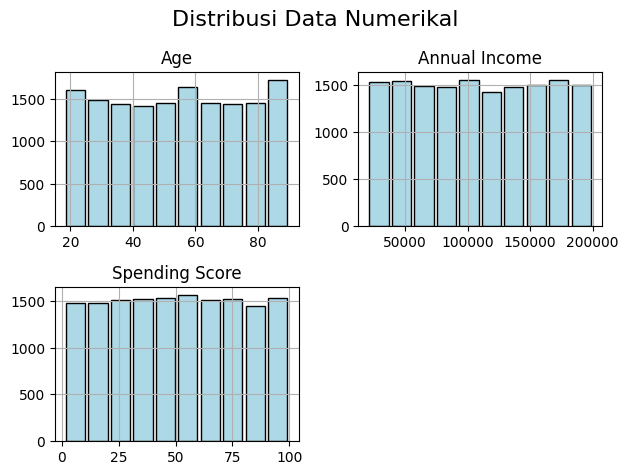

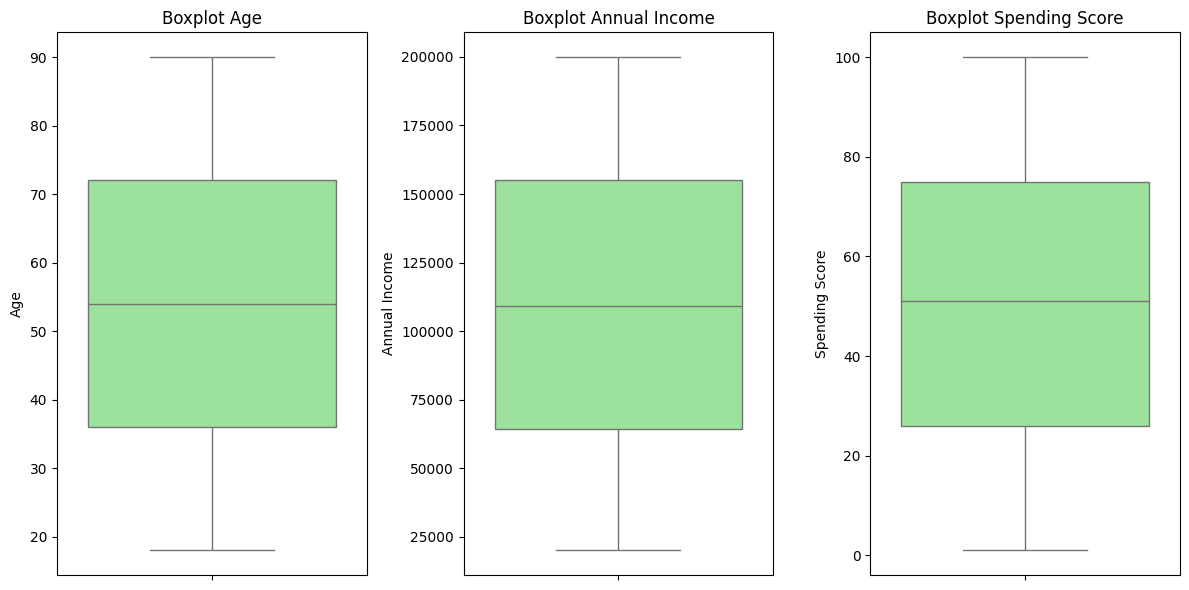


Matriks Korelasi:
                     Age  Annual Income  Spending Score
Age             1.000000       0.004776       -0.008251
Annual Income   0.004776       1.000000        0.003234
Spending Score -0.008251       0.003234        1.000000


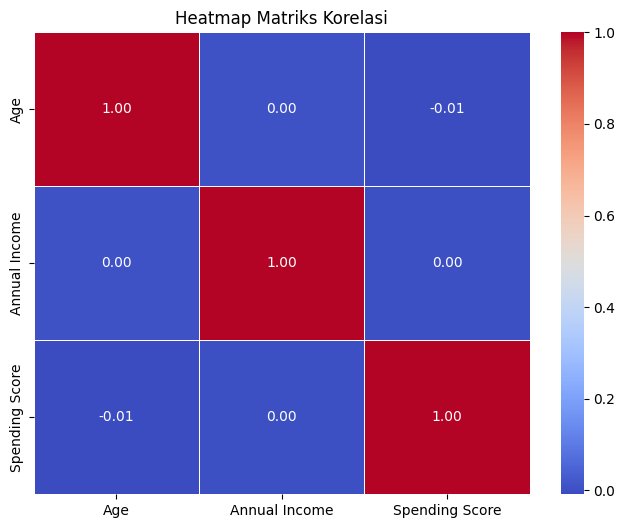

In [9]:
df = pd.DataFrame(train)

# 1. Statistik Deskriptif
print("Statistik Deskriptif:")
print(df.describe())

# 2. Visualisasi Distribusi (Histogram)
numerical_columns = ['Age', 'Annual Income', 'Spending Score']

# Membuat histogram untuk distribusi data numerik
plt.figure(figsize=(10, 6))
df[numerical_columns].hist(bins=10, edgecolor='black', color='lightblue', rwidth=0.85)
plt.suptitle('Distribusi Data Numerikal', fontsize=16)
plt.tight_layout()
plt.show()

# 3. Boxplot untuk deteksi outlier
plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=df[column], color='lightgreen')
    plt.title(f'Boxplot {column}')
plt.tight_layout()
plt.show()

# 4. Matriks Korelasi
correlation_matrix = df[numerical_columns].corr()
print("\nMatriks Korelasi:")
print(correlation_matrix)

# 5. Heatmap untuk Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Matriks Korelasi')
plt.show()



### 4. Visualisasi Data

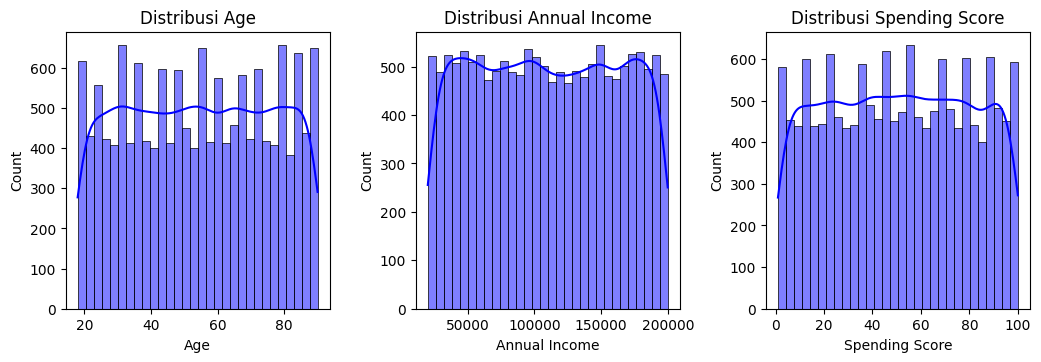

In [10]:
# Distribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

<ipython-input-11-5d3243338f50>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


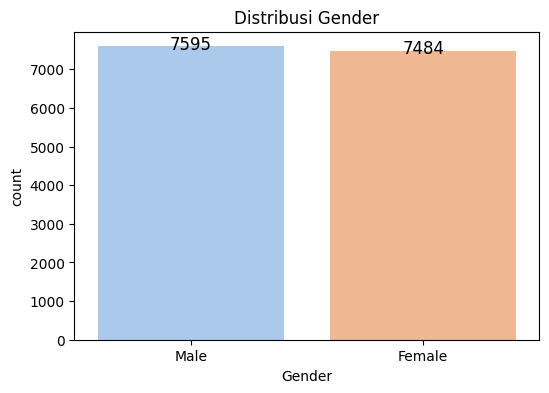

In [11]:
# Visualisasi distribusi untuk variabel kategorikal
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='pastel')

# Menambahkan jumlah data pada setiap kategori di atas batang
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 50,
             f'{int(p.get_height())}',
             ha='center', va='center', fontsize=12)

plt.title('Distribusi Gender')
plt.show()


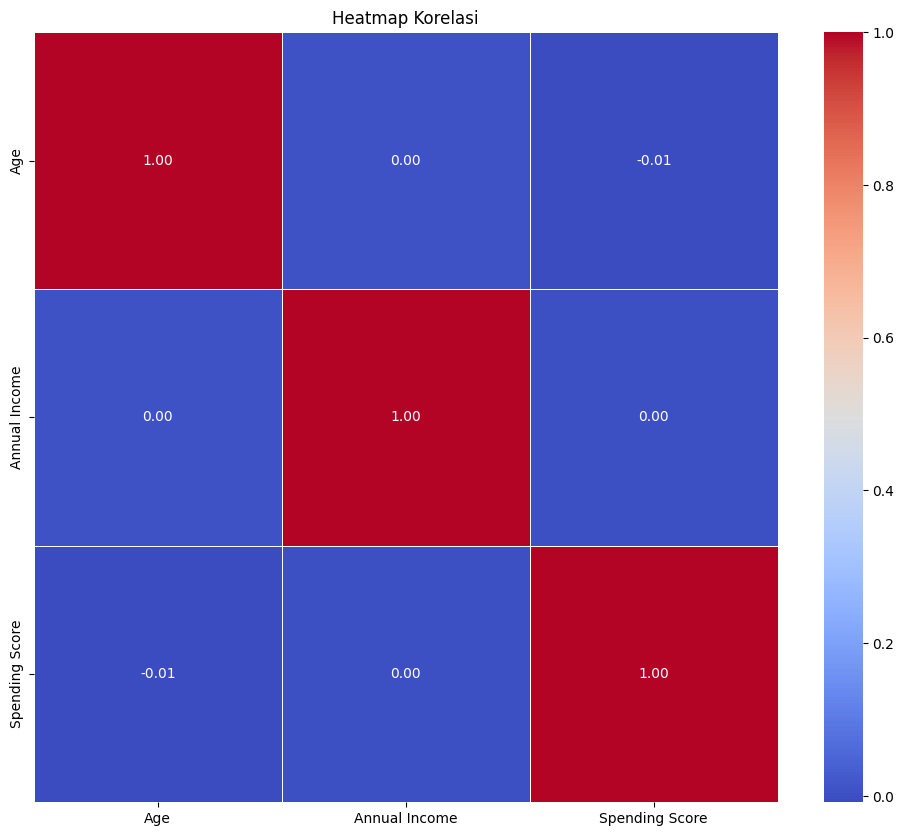

In [12]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

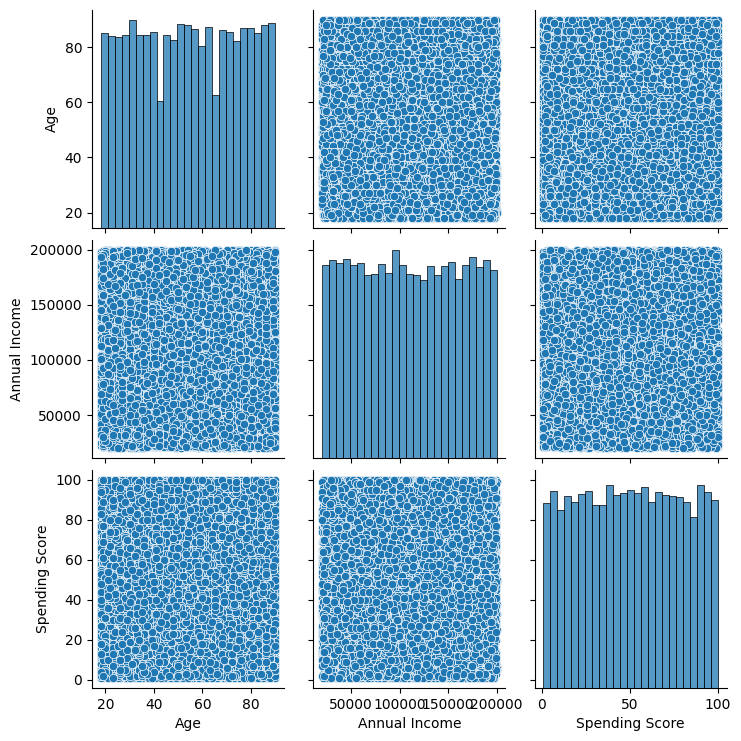

In [13]:
# Pairplot untuk fitur numerik
sns.pairplot(num_features)
plt.show()

<ipython-input-14-3c70ca404366>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='viridis')


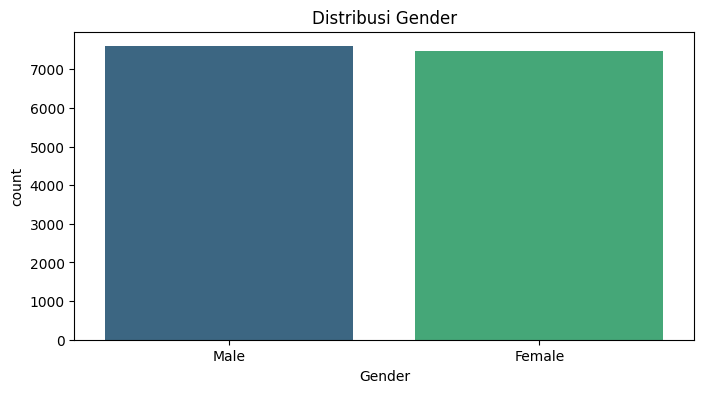

In [14]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Distribusi Gender')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

### Cek Missing Values

In [15]:
# Mengecek missing values
missing_values = df.isnull().sum()

# Menampilkan jumlah missing values di setiap kolom
print("Jumlah Missing Values di Setiap Kolom:")
print(missing_values)

Jumlah Missing Values di Setiap Kolom:
Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64


In [16]:
df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57
4,64139426-2226-4cd6-bf09-91bce4b4db5e,24,Male,153752,76


### Hapus Kolom ID

In [17]:
df = df.drop(columns=['Customer ID'])
df.head()

,Age,Gender,Annual Income,Spending Score
0,30,Male,151479,89
1,58,Female,185088,95
2,62,Female,70912,76
3,23,Male,55460,57
4,24,Male,153752,76


### Label Encoding

In [18]:
# Mengubah kolom Gender menjadi angka menggunakan LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

df.head()

,Age,Gender,Annual Income,Spending Score
0,30,1,151479,89
1,58,0,185088,95
2,62,0,70912,76
3,23,1,55460,57
4,24,1,153752,76


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

       Age  Gender  Annual Income  Spending Score  Cluster
0       30       1         151479              89        1
1       58       0         185088              95        1
2       62       0          70912              76        0
3       23       1          55460              57        0
4       24       1         153752              76        1
...    ...     ...            ...             ...      ...
15074   29       0          97723              30        2
15075   22       1          73361              74        0
15076   18       0         112337              48        2
15077   26       0          94312               5        2
15078   19       1          78045               2        0

[15079 rows x 5 columns]


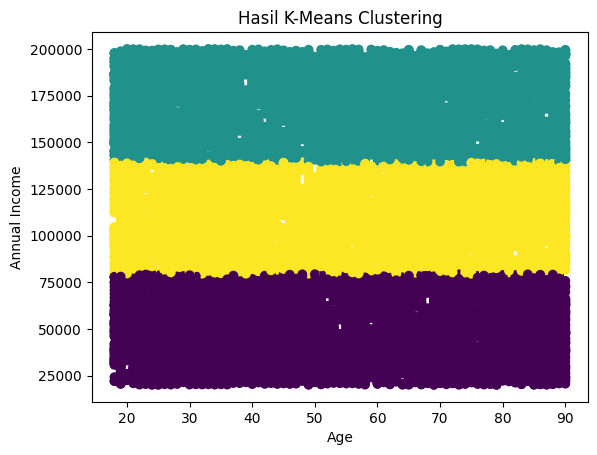

In [19]:
#Mentukan jumlah cluster yang diinginkan
from sklearn.cluster import KMeans
n_clusters = 3  # Misalnya kita memilih 3 cluster

#Melatih model clustering K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'Gender', 'Annual Income', 'Spending Score']])

# Lihat hasil clustering
print(df)

# Visualisasi hasil clustering (jika dimensi 2 atau lebih)
plt.scatter(df['Age'], df['Annual Income'], c=df['Cluster'], cmap='viridis')
plt.title('Hasil K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

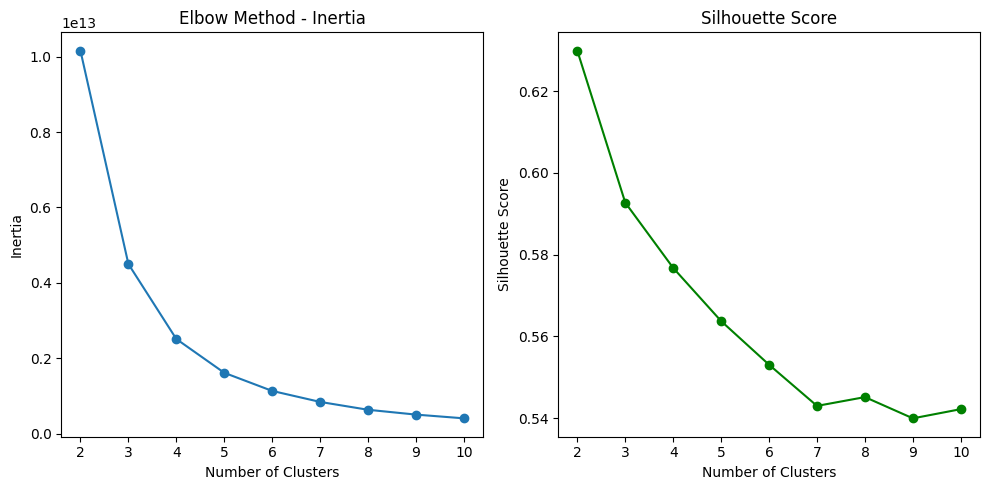

Jumlah cluster optimal berdasarkan Silhouette Score: 2


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Menentukan rentang jumlah cluster untuk pengujian
range_n_clusters = list(range(2, 11))  # Menguji jumlah cluster dari 2 sampai 10

# Elbow Method dan Silhouette Score
inertia = []
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df[['Age', 'Gender', 'Annual Income', 'Spending Score']])

    # Menyimpan inertia untuk Elbow Method
    inertia.append(kmeans.inertia_)

    # Menghitung Silhouette Score
    score = silhouette_score(df[['Age', 'Gender', 'Annual Income', 'Spending Score']], kmeans.labels_)
    silhouette_scores.append(score)

# Plot Elbow Method
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method - Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Menampilkan hasil terbaik
best_silhouette_score = max(silhouette_scores)
best_cluster_count = range_n_clusters[silhouette_scores.index(best_silhouette_score)]

print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {best_cluster_count}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [21]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

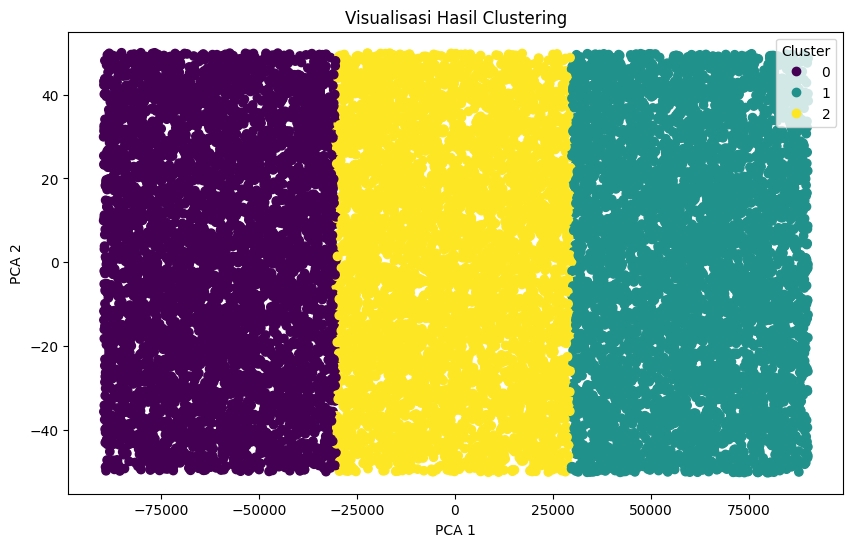

In [22]:
from sklearn.decomposition import PCA
# Tentukan jumlah cluster optimal berdasarkan hasil sebelumnya (misalnya 3 cluster)
n_clusters_optimal = 3

#Terapkan KMeans dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=n_clusters_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Age', 'Gender', 'Annual Income', 'Spending Score']])

# Proyeksi PCA untuk mereduksi dimensi menjadi 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[['Age', 'Gender', 'Annual Income', 'Spending Score']])

# Menambahkan hasil PCA ke DataFrame
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# Visualisasi hasil clustering menggunakan scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis')
plt.title('Visualisasi Hasil Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Menambahkan legenda
plt.legend(*scatter.legend_elements(), title="Cluster")

# Menampilkan plot
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [23]:
# Analisis distribusi setiap fitur dalam masing-masing cluster
cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'std', 'min', 'max'],
    'Gender': ['mean', 'std', 'min', 'max'],
    'Annual Income': ['mean', 'std', 'min', 'max'],
    'Spending Score': ['mean', 'std', 'min', 'max']
}).reset_index()

# Menampilkan ringkasan karakteristik tiap cluster
print(cluster_summary)


  Cluster        Age                       Gender                    \
                mean        std min max      mean       std min max   
0       0  54.020465  20.920561  18  90  0.504470  0.500030   0   1   
1       1  54.195380  21.294080  18  90  0.503915  0.500034   0   1   
2       2  54.362090  21.141951  18  90  0.502633  0.500044   0   1   

   Annual Income                               Spending Score                 \
            mean           std     min     max           mean        std min   
0   49486.742698  17105.019846   20022   79382      50.257302  28.670673   1   
1  169740.817150  17442.083068  139542  199974      50.660924  28.843781   1   
2  109094.780478  17276.519520   79435  139525      50.860672  28.665661   1   

        
   max  
0  100  
1  100  
2  100  


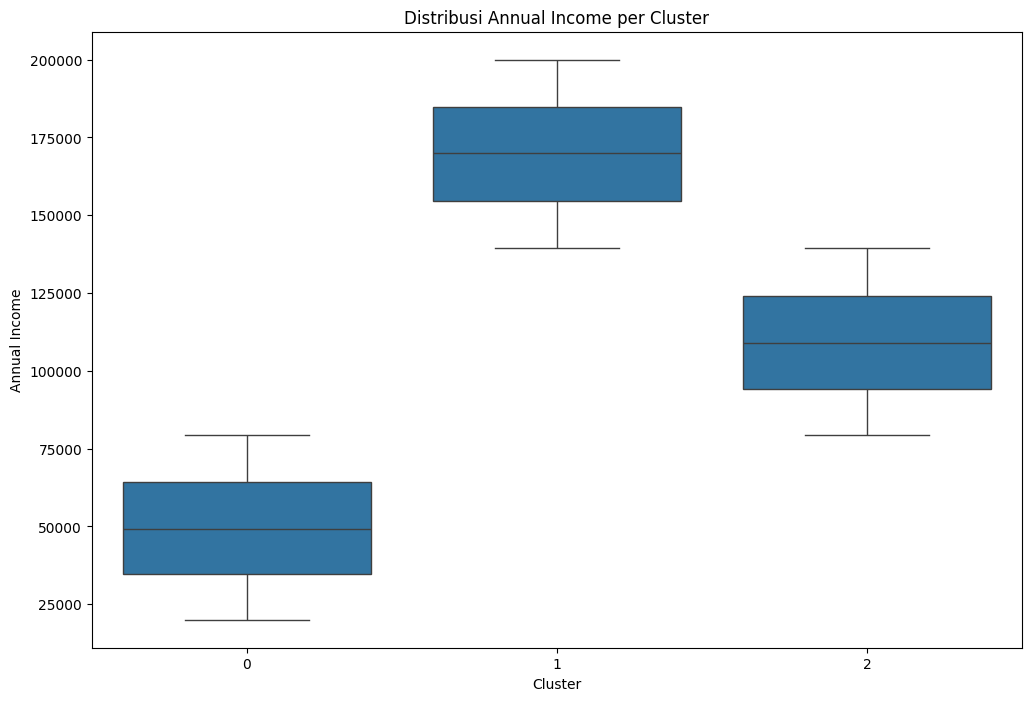

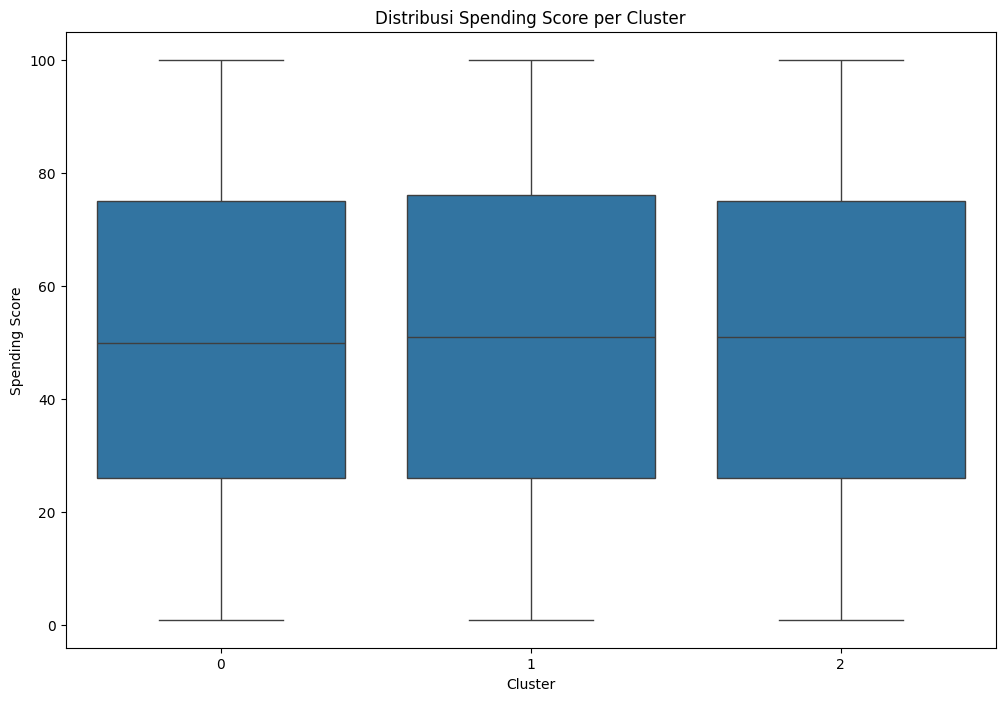

In [24]:
# Visualisasi distribusi fitur per cluster
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Annual Income', data=df)
plt.title('Distribusi Annual Income per Cluster')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Spending Score', data=df)
plt.title('Distribusi Spending Score per Cluster')
plt.show()

Tulis hasil interpretasinya di sini.
1. Cluster 0:
*  Age: Rata-rata usia di cluster ini adalah 54.02 tahun, dengan rentang usia antara 18 hingga 90 tahun.
*   Gender: Gender di cluster ini rata-rata adalah 0.50, menunjukkan distribusi yang hampir seimbang antara pria dan wanita.ribusi gender yang seimbang antara laki-laki dan perempuan dalam cluster ini.
*   Annual Income: Rata-rata pendapatan tahunan adalah 49,486.74, dengan rentang dari 20,022 hingga 79,382..
*   Spending Score: Rata-rata skor pengeluaran adalah 50.26, dengan rentang dari 1 hingga 100.
*   Kesimpulan: Cluster ini terdiri dari pelanggan dengan usia menengah, pendapatan menengah. Cocok untuk produk dengan harga terjangkau dan kebutuhan sehari-hari.

2. Cluster 1:
*   Age: Rata-rata usia di cluster ini adalah 54.19 tahun, dengan rentang usia antara 18 hingga 90 tahun.
*   Gender: Gender di cluster ini rata-rata adalah 0.50, menunjukkan distribusi yang hampir seimbang antara pria dan wanita.
*   Annual Income: Rata-rata pendapatan tahunan adalah 169,740.82, dengan rentang dari 139,542 hingga 199,974
*   Spending Score: Rata-rata skor pengeluaran adalah 50.66, dengan rentang dari 1 hingga 100.
*   Kesimpulan: Cluster ini terdiri dari pelanggan dengan usia menengah ke atas, pendapatan tinggi, dan pengeluaran sedang. Mereka cocok untuk produk premium atau layanan yang menawarkan nilai tambah


3. Cluster 2:
*   Age: Rata-rata usia di cluster ini adalah 54.36 tahun, dengan rentang usia antara 18 hingga 90 tahun.
*   Gender: Gender di cluster ini rata-rata adalah 0.50, menunjukkan distribusi yang hampir seimbang antara pria dan wanita.
*   Annual Income: Rata-rata pendapatan tahunan adalah 109,094.78, dengan rentang dari 79,435 hingga 139,525.
*   Spending Score: Rata-rata skor pengeluaran adalah 50.86, dengan rentang dari 1 hingga 100.
*   Kesimpulan: Cluster ini terdiri dari pelanggan dengan usia menengah ke atas, pendapatan menengah-atas, dan pengeluaran tinggi. Mereka cocok untuk produk-produk berkualitas tinggi yang menawarkan pengalaman atau kenyamanan tambahan,







# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [25]:
# Menambahkan kolom 'Cluster' ke DataFrame asli
df['Cluster'] = kmeans.labels_

# Mengekspor DataFrame ke dalam file CSV
df.to_csv('hasil_clustering.csv', index=False)

print("Data berhasil disimpan dalam 'hasil_clustering.csv'")

Data berhasil disimpan dalam 'hasil_clustering.csv'


In [28]:
cluster = pd.read_csv("/content/hasil_clustering.csv")
cluster.head(20)

,Age,Gender,Annual Income,Spending Score,Cluster,PCA1,PCA2
0,30,1,151479,89,1,41736.119459,38.651803
1,58,0,185088,95,1,75345.119524,44.222048
2,62,0,70912,76,0,-38830.880502,25.370909
3,23,1,55460,57,0,-54282.880611,6.915422
4,24,1,153752,76,1,44009.119424,25.728288
5,42,1,158335,40,1,48592.119395,-10.514592
6,27,0,163501,37,1,53758.119361,-13.325170
7,24,1,70476,17,0,-39266.880680,-33.120617
8,83,1,47743,34,0,-61999.880536,-16.862362
9,62,0,63448,3,0,-46294.880632,-47.609629
